#### Libraries Needed

In [1]:
import os
import numpy as np
import scipy as sp
import scipy.io.wavfile as wf

import datetime

import matplotlib.pyplot as plt

In [2]:
# main folder path
os.chdir('../')
# matplotlib
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
# Own Library
import ppfunctions_1 as ppf

#### Data Loading

In [4]:
# Looking for heart sounds data absolute path 
l1 = os.path.abspath('database/noche/n202106090212.wav')

# reading file
sf, sound = wf.read(l1)
# sound time 
stime = str(datetime.timedelta(seconds=len(sound)/sf))
print(f'Sound duration: {stime} seconds')

Sound duration: 3:02:23.640000 seconds


Let's take 1 minute of the sound

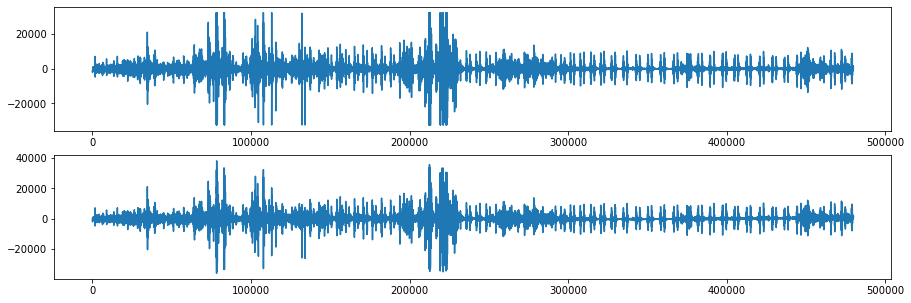

In [5]:
minutes = 1
#sample = sound[0:int(minutes*60)*sf]
sample = sound[int(minutes*60)*sf:int(2*60)*sf]
plt.subplot(2,1,1)
plt.plot(sample)
plt.subplot(2,1,2)
# Filtering signal
sample = ppf.bandpass_filter(sample, 0.01, 400, sf, 3)
plt.plot(sample)

In [6]:
def detect_outlier(data_1, threshold):
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    outliers, idx = [], []
    for n, y in enumerate(data_1):
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            idx.append(n)
    return outliers,idx

In [7]:
outli, posit = detect_outlier(np.ediff1d(sample)**2, 40)

In [8]:
# # sample[posit] = 0
# new_sample = np.copy(sample)
# for i, p in enumerate(posit):
#     new_sample[p] = 0

In [9]:
# plt.plot(sample)
peakv = np.zeros(len(sample))
for i, p in enumerate(posit):
    peakv[p] = outli[i]

In [10]:
# plt.plot(np.abs(sp.stats.zscore(np.ediff1d(sample)**2)))

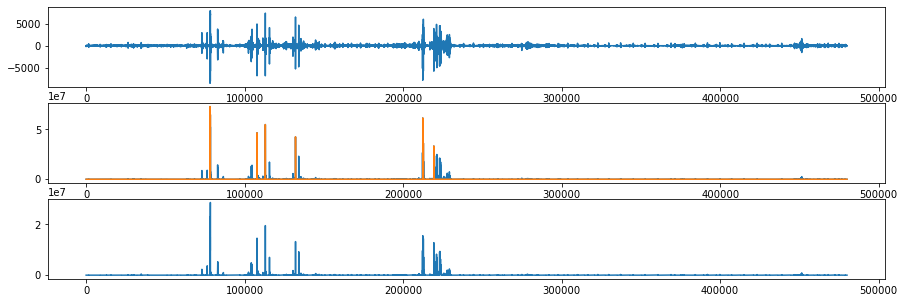

In [11]:
plt.subplot(3,1,1)
plt.plot(np.ediff1d(sample))
plt.subplot(3,1,2)
plt.plot(np.ediff1d(sample)**2)
plt.plot(peakv)
#plt.axhline(y=np.std(np.ediff1d(sample)**2), color='r')
plt.subplot(3,1,3)
plt.plot(np.convolve(np.ediff1d(sample)**2, np.ones(30)/30))

In [12]:
stop

NameError: name 'stop' is not defined

In [13]:
# peak detection
peaks = ppf.findpeaks(data = np.ediff1d(sample)**2, limit = 0.35, spacing = int(sf/2))
# finds peaks position in sample
peaks_values = sample[peaks]
# time when the peak happened
peak_time = peaks * 1/sf
# peak interval
peak_interval = np.diff(peak_time)
# beats per minute
bpm = 60/peak_interval

peakv = np.zeros(len(sample))
for i, p in enumerate(peaks):
    peakv[p] = peaks_values[i]

# vector time
vt = np.arange(len(sample)) * 1/sf

Text(0.5, 0, 'Time (sec)')

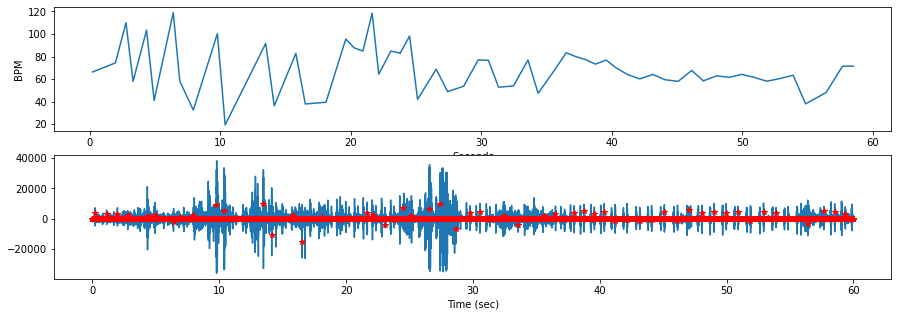

In [14]:
plt.subplot(2,1,1)
plt.plot(peak_time[:-1], bpm)
plt.ylabel('BPM')
plt.xlabel('Seconds')
plt.subplot(2,1,2)
plt.plot(vt, sample)
plt.plot(vt, peakv, 'r*')
plt.xlabel('Time (sec)')

### Creating a TimeStamp

In [ ]:
# gain = 1
# #   mean
# mean_RR = np.mean(peaks_values/sf*1000)
# mean_Peaks = np.mean(peaks_values*gain)

# #   median
# median_RR = np.median(peaks_values/sf*1000)
# median_Peaks = np.median(peaks_values*gain)

# #   standard deviation
# std_RR = np.std(peaks_values/sf*1000)
# std_Peaks = np.std(peaks_values*gain)

# #   variance
# var_RR = sp.stats.tvar(peaks_values/sf*1000)
# var_Peaks = sp.stats.tvar(peaks_values*gain)

# #   Skewness
# skew_RR = sp.stats.skew(peaks_values/sf*1000)
# skew_Peaks = sp.stats.skew(peaks_values*gain)

# #   Kurtosis
# kurt_RR = sp.stats.kurtosis(peaks_values/sf*1000)
# kurt_Peaks = sp.stats.kurtosis(peaks_values*gain)